# Demo 2 - Implementações de GANs padrão usando camadas totalmente conectadas e a biblioteca Keras (Dataset MNIST - Dígitos Manuscritos)

- Dados

Redimensionando as imagens MNIST entre -1 e 1.

- Gerador

Rede neural simples totalmente conectada, ativação LeakyReLU e BatchNormalization.

A entrada para o gerador é chamada de 'amostra latente' (100 valores), que é uma série de números gerados aleatoriamente, e produz 784 (= 28x28) pontos de dados que representam uma imagem de dígito. Utilizaremos a distribuição normal.

A última ativação é tanh.

- Discriminador

Rede neural simples totalmente conectada e ativação LeakyReLU.

A última ativação é sigmóide.

- Perda

binary_crossentropy

- Otimizador

Adam (lr = 0,0002, beta_1 = 0,5) batch_size = 64 épocas = 100



In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [3]:
# Carregando nosso dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


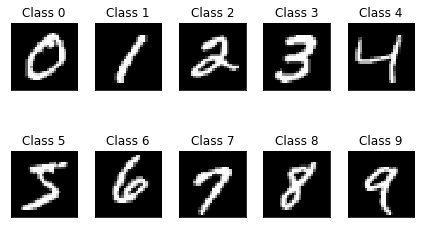

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [5]:
print('X_train.shape', X_train.shape)

# Transformando nossas imagens de entrada

X_train = X_train.reshape(60000, 28*28)

# Normalizando nossas entradas entre (-1, 1)

X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [6]:
# Dimensão de espaço latente

latent_dim = 100

# Dimensão da imagem 28x28

img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Rede geradora

generator = Sequential()

# Camada de entra e camada escondida 1

generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 2

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 3

generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada de saída (output) 

generator.add(Dense(img_dim, activation='tanh'))


In [7]:
# prints a summary representation of your model

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [0]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [9]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [10]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 784)               583312    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 265601    
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoch = 1/200, d_loss=0.751, g_loss=1.617                                                                                                     


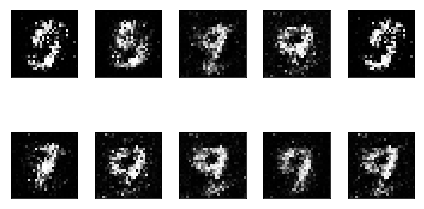

epoch = 2/200, d_loss=0.703, g_loss=1.417                                                                                                     
epoch = 3/200, d_loss=0.487, g_loss=1.557                                                                                                     
epoch = 4/200, d_loss=0.525, g_loss=1.577                                                                                                     
epoch = 5/200, d_loss=0.564, g_loss=1.287                                                                                                     
epoch = 6/200, d_loss=0.558, g_loss=1.165                                                                                                     
epoch = 7/200, d_loss=0.579, g_loss=1.070                                                                                                     
epoch = 8/200, d_loss=0.635, g_loss=1.118                                                                                                     

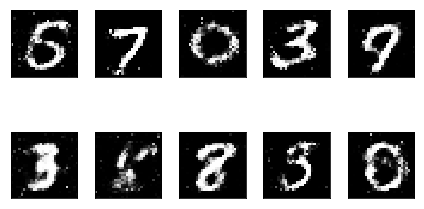

epoch = 12/200, d_loss=0.639, g_loss=1.065                                                                                                     
epoch = 13/200, d_loss=0.581, g_loss=1.022                                                                                                     
epoch = 14/200, d_loss=0.573, g_loss=1.041                                                                                                     
epoch = 15/200, d_loss=0.636, g_loss=1.014                                                                                                     
epoch = 16/200, d_loss=0.606, g_loss=1.072                                                                                                     
epoch = 17/200, d_loss=0.598, g_loss=1.011                                                                                                     
epoch = 18/200, d_loss=0.611, g_loss=1.056                                                                                              

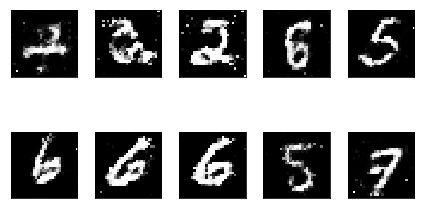

epoch = 22/200, d_loss=0.616, g_loss=1.007                                                                                                     
epoch = 23/200, d_loss=0.606, g_loss=1.002                                                                                                     
epoch = 24/200, d_loss=0.583, g_loss=1.053                                                                                                     
epoch = 25/200, d_loss=0.624, g_loss=1.074                                                                                                     
epoch = 26/200, d_loss=0.628, g_loss=1.066                                                                                                     
epoch = 27/200, d_loss=0.624, g_loss=1.180                                                                                                     
epoch = 28/200, d_loss=0.554, g_loss=1.148                                                                                              

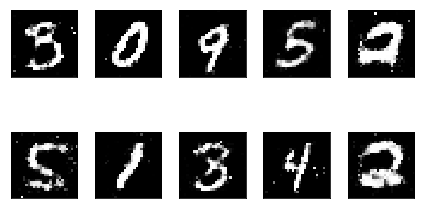

epoch = 32/200, d_loss=0.582, g_loss=1.136                                                                                                     
epoch = 33/200, d_loss=0.535, g_loss=1.195                                                                                                     
epoch = 34/200, d_loss=0.602, g_loss=1.147                                                                                                     
epoch = 35/200, d_loss=0.562, g_loss=1.123                                                                                                     
epoch = 36/200, d_loss=0.597, g_loss=1.079                                                                                                     
epoch = 37/200, d_loss=0.588, g_loss=1.123                                                                                                     
epoch = 38/200, d_loss=0.612, g_loss=1.120                                                                                              

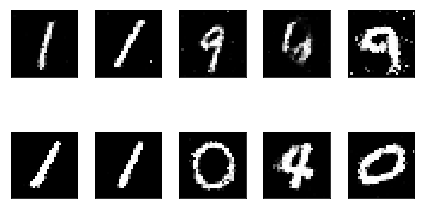

epoch = 42/200, d_loss=0.513, g_loss=1.182                                                                                                     
epoch = 43/200, d_loss=0.562, g_loss=1.201                                                                                                     
epoch = 44/200, d_loss=0.543, g_loss=1.298                                                                                                     
epoch = 45/200, d_loss=0.568, g_loss=1.168                                                                                                     
epoch = 46/200, d_loss=0.517, g_loss=1.218                                                                                                     
epoch = 47/200, d_loss=0.566, g_loss=1.280                                                                                                     
epoch = 48/200, d_loss=0.539, g_loss=1.233                                                                                              

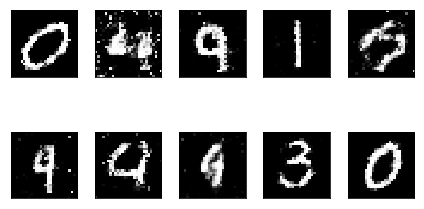

epoch = 52/200, d_loss=0.548, g_loss=1.188                                                                                                     
epoch = 53/200, d_loss=0.531, g_loss=1.281                                                                                                     
epoch = 54/200, d_loss=0.584, g_loss=1.277                                                                                                     
epoch = 55/200, d_loss=0.521, g_loss=1.475                                                                                                     
epoch = 56/200, d_loss=0.507, g_loss=1.273                                                                                                     
epoch = 57/200, d_loss=0.549, g_loss=1.378                                                                                                     
epoch = 58/200, d_loss=0.537, g_loss=1.537                                                                                              

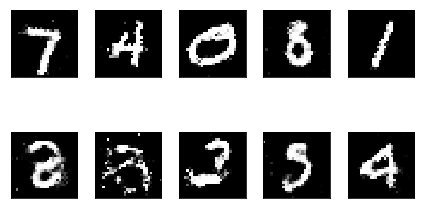

epoch = 62/200, d_loss=0.494, g_loss=1.319                                                                                                     
epoch = 63/200, d_loss=0.480, g_loss=1.491                                                                                                     
epoch = 64/200, d_loss=0.512, g_loss=1.405                                                                                                     
epoch = 65/200, d_loss=0.533, g_loss=1.423                                                                                                     
epoch = 66/200, d_loss=0.538, g_loss=1.400                                                                                                     
epoch = 67/200, d_loss=0.505, g_loss=1.364                                                                                                     
epoch = 68/200, d_loss=0.480, g_loss=1.386                                                                                              

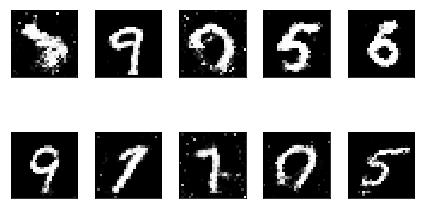

epoch = 72/200, d_loss=0.487, g_loss=1.439                                                                                                     
epoch = 73/200, d_loss=0.531, g_loss=1.385                                                                                                     
epoch = 74/200, d_loss=0.504, g_loss=1.487                                                                                                     
epoch = 75/200, d_loss=0.526, g_loss=1.487                                                                                                     
epoch = 76/200, d_loss=0.519, g_loss=1.562                                                                                                     
epoch = 77/200, d_loss=0.477, g_loss=1.463                                                                                                     
epoch = 78/200, d_loss=0.498, g_loss=1.489                                                                                              

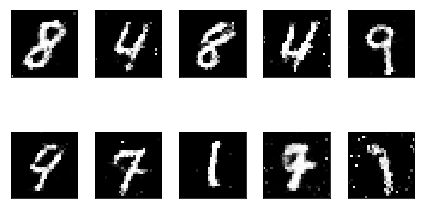

epoch = 82/200, d_loss=0.513, g_loss=1.423                                                                                                     
epoch = 83/200, d_loss=0.512, g_loss=1.408                                                                                                     
epoch = 84/200, d_loss=0.491, g_loss=1.487                                                                                                     
epoch = 85/200, d_loss=0.451, g_loss=1.565                                                                                                     
epoch = 86/200, d_loss=0.563, g_loss=1.442                                                                                                     
epoch = 87/200, d_loss=0.515, g_loss=1.501                                                                                                     
epoch = 88/200, d_loss=0.501, g_loss=1.538                                                                                              

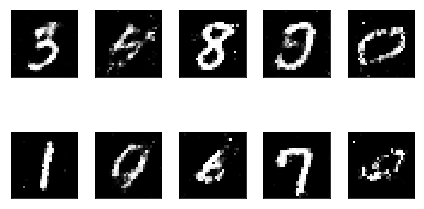

epoch = 92/200, d_loss=0.520, g_loss=1.498                                                                                                     
epoch = 93/200, d_loss=0.502, g_loss=1.593                                                                                                     
epoch = 94/200, d_loss=0.518, g_loss=1.528                                                                                                     
epoch = 95/200, d_loss=0.478, g_loss=1.567                                                                                                     
epoch = 96/200, d_loss=0.445, g_loss=1.576                                                                                                     
epoch = 97/200, d_loss=0.507, g_loss=1.587                                                                                                     
epoch = 98/200, d_loss=0.440, g_loss=1.527                                                                                              

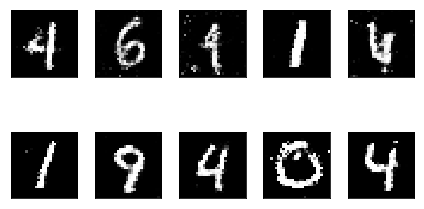

epoch = 102/200, d_loss=0.496, g_loss=1.576                                                                                                     
epoch = 103/200, d_loss=0.455, g_loss=1.771                                                                                                     
epoch = 104/200, d_loss=0.483, g_loss=1.659                                                                                                     
epoch = 105/200, d_loss=0.460, g_loss=1.663                                                                                                     
epoch = 106/200, d_loss=0.535, g_loss=1.715                                                                                                     
epoch = 107/200, d_loss=0.475, g_loss=1.675                                                                                                     
epoch = 108/200, d_loss=0.426, g_loss=1.654                                                                                       

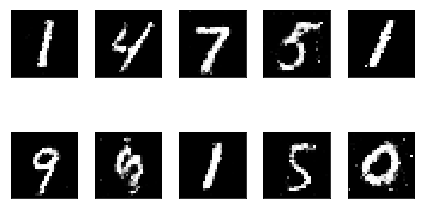

epoch = 112/200, d_loss=0.473, g_loss=1.698                                                                                                     
epoch = 113/200, d_loss=0.474, g_loss=1.716                                                                                                     
epoch = 114/200, d_loss=0.483, g_loss=1.697                                                                                                     
epoch = 115/200, d_loss=0.463, g_loss=1.701                                                                                                     
epoch = 116/200, d_loss=0.467, g_loss=1.685                                                                                                     
epoch = 117/200, d_loss=0.497, g_loss=1.776                                                                                                     
epoch = 118/200, d_loss=0.461, g_loss=1.613                                                                                       

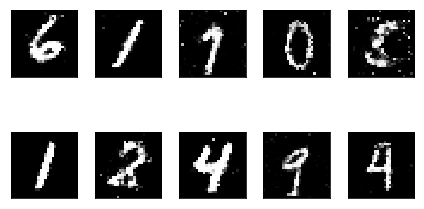

epoch = 122/200, d_loss=0.456, g_loss=1.744                                                                                                     
epoch = 123/200, d_loss=0.445, g_loss=1.848                                                                                                     
epoch = 124/200, d_loss=0.466, g_loss=1.653                                                                                                     
epoch = 125/200, d_loss=0.484, g_loss=1.676                                                                                                     
epoch = 126/200, d_loss=0.525, g_loss=1.673                                                                                                     
epoch = 127/200, d_loss=0.470, g_loss=1.761                                                                                                     
epoch = 128/200, d_loss=0.489, g_loss=1.590                                                                                       

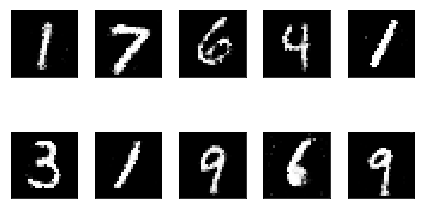

epoch = 132/200, d_loss=0.498, g_loss=1.840                                                                                                     
epoch = 133/200, d_loss=0.459, g_loss=1.804                                                                                                     
epoch = 134/200, d_loss=0.483, g_loss=1.741                                                                                                     
epoch = 135/200, d_loss=0.418, g_loss=1.772                                                                                                     
epoch = 136/200, d_loss=0.520, g_loss=1.859                                                                                                     
epoch = 137/200, d_loss=0.516, g_loss=1.669                                                                                                     
epoch = 138/200, d_loss=0.472, g_loss=1.853                                                                                       

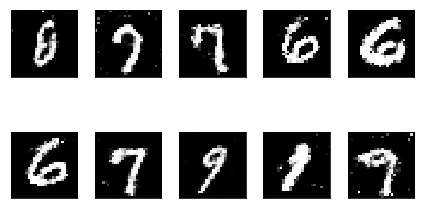

epoch = 142/200, d_loss=0.424, g_loss=1.985                                                                                                     
epoch = 143/200, d_loss=0.488, g_loss=1.861                                                                                                     
epoch = 144/200, d_loss=0.443, g_loss=2.007                                                                                                     
epoch = 145/200, d_loss=0.535, g_loss=1.926                                                                                                     
epoch = 146/200, d_loss=0.437, g_loss=1.900                                                                                                     
epoch = 147/200, d_loss=0.511, g_loss=1.794                                                                                                     
epoch = 148/200, d_loss=0.526, g_loss=1.978                                                                                       

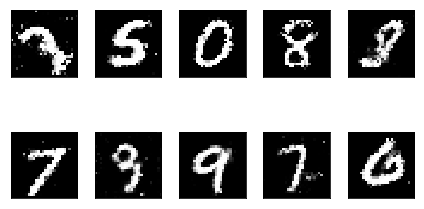

epoch = 152/200, d_loss=0.442, g_loss=1.779                                                                                                     
epoch = 153/200, d_loss=0.452, g_loss=1.948                                                                                                     
epoch = 154/200, d_loss=0.445, g_loss=1.801                                                                                                     
epoch = 155/200, d_loss=0.411, g_loss=1.854                                                                                                     
epoch = 156/200, d_loss=0.431, g_loss=2.025                                                                                                     
epoch = 157/200, d_loss=0.455, g_loss=2.052                                                                                                     
epoch = 158/200, d_loss=0.395, g_loss=1.922                                                                                       

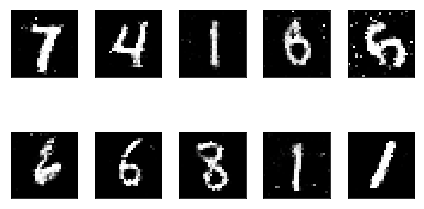

epoch = 162/200, d_loss=0.486, g_loss=1.984                                                                                                     
epoch = 163/200, d_loss=0.390, g_loss=1.837                                                                                                     
epoch = 164/200, d_loss=0.430, g_loss=1.924                                                                                                     
epoch = 165/200, d_loss=0.480, g_loss=2.048                                                                                                     
epoch = 166/200, d_loss=0.432, g_loss=2.024                                                                                                     
epoch = 167/200, d_loss=0.466, g_loss=1.945                                                                                                     
epoch = 168/200, d_loss=0.488, g_loss=1.994                                                                                       

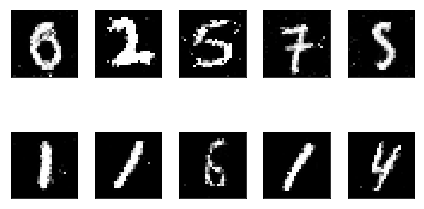

epoch = 172/200, d_loss=0.520, g_loss=1.835                                                                                                     
epoch = 173/200, d_loss=0.415, g_loss=1.861                                                                                                     
epoch = 174/200, d_loss=0.456, g_loss=1.917                                                                                                     
epoch = 175/200, d_loss=0.486, g_loss=2.047                                                                                                     
epoch = 176/200, d_loss=0.431, g_loss=1.942                                                                                                     
epoch = 177/200, d_loss=0.401, g_loss=2.025                                                                                                     
epoch = 178/200, d_loss=0.392, g_loss=2.066                                                                                       

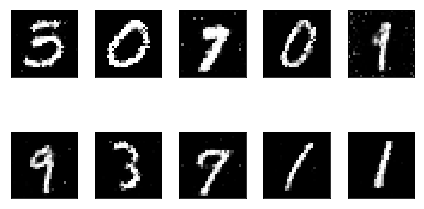

epoch = 182/200, d_loss=0.420, g_loss=1.969                                                                                                     
epoch = 183/200, d_loss=0.490, g_loss=2.242                                                                                                     
epoch = 184/200, d_loss=0.520, g_loss=1.887                                                                                                     
epoch = 185/200, d_loss=0.468, g_loss=2.027                                                                                                     
epoch = 186/200, d_loss=0.444, g_loss=1.975                                                                                                     
epoch = 187/200, d_loss=0.432, g_loss=2.461                                                                                                     
epoch = 188/200, d_loss=0.381, g_loss=2.025                                                                                       

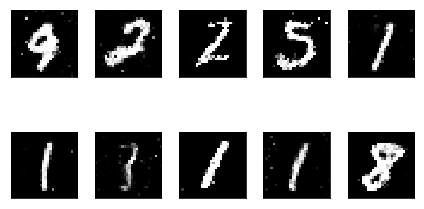

epoch = 192/200, d_loss=0.459, g_loss=1.992                                                                                                     
epoch = 193/200, d_loss=0.456, g_loss=2.244                                                                                                     
epoch = 194/200, d_loss=0.450, g_loss=1.938                                                                                                     
epoch = 195/200, d_loss=0.401, g_loss=2.237                                                                                                     
epoch = 196/200, d_loss=0.435, g_loss=1.976                                                                                                     
epoch = 197/200, d_loss=0.450, g_loss=2.134                                                                                                     
epoch = 198/200, d_loss=0.438, g_loss=1.949                                                                                       

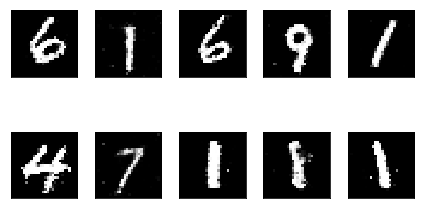

In [13]:
epochs = 200
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

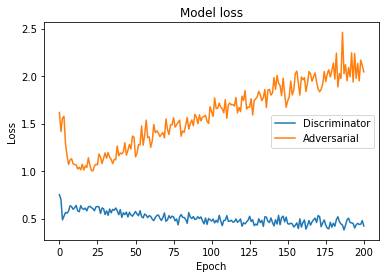

In [14]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()